In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from astropy.time import Time
import astropy.units as u

import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates.angles import Angle

from fpipe.utils import coord

In [3]:
_Lon = (106. + 51./60. + 24.0/3600.) * u.deg
_Lat = (25. + 39./60. + 10.6/3600.) * u.deg
_Location = EarthLocation.from_geodetic(_Lon, _Lat)


def check_pointing(cal0, coord_file_list):
    
    beam_lines = [
        [9, 10, 11],
        [2, 3, 8, 12],
        [0, 1, 4, 7, 13],
        [5, 6, 14, 18],
        [15, 16, 17],
    ]

    fig2, ax2 = coord.beam_axes()
    close_points = np.ones(19) * 1.e9
    
    for cc, coord_file in enumerate(coord_file_list):
        # convert antenna XYZ to az alt.
        t, az_c, alt_c = coord.xyz2azalt(coord_file)
        obs = AltAz(obstime=t, location=_Location)
        cal = cal0.transform_to(obs)
        cal_alt, cal_az = cal.alt.deg, cal.az.deg
        cal_az[cal_az>180] -= 360.
        cal_az[cal_az<-180] += 360.
        
        t   = t.unix
        az_c  = az_c.to(u.deg).value
        az_c[az_c>180.] -= 360.
        alt_c = alt_c.to(u.deg).value

        az, alt, c0_ra, c0_dec = coord.get_pointing_any_scan(t, alt_c, az_c)

        print 90. - alt_c[-1], az_c[-1]
        for i in range(19):
            
            cal_xi, cal_yi = coord.project_to_antenna_coord(cal_alt, cal_az,
                                                            alt[-1, i],  az[-1, i])
            
            if i in beam_lines[cc]:
                ax2[i].plot(cal_xi, cal_yi, 'r-', ms=2)
            else:
                ax2[i].plot(cal_xi, cal_yi, 'r--', ms=2)
            _d = (cal_xi**2 + cal_yi**2) ** 0.5
            if _d.min() < close_points[i]: close_points[i] = _d.min()
            
            cal_xi, cal_yi = coord.project_to_antenna_coord(alt[-900:, i], az[-900:, i],
                                                            alt[-1, i], az[-1, i])
            ax2[i].plot(cal_xi, cal_yi, 'g.', ms=2)

        
    fwhm = 2.9 / 60. / (2. * np.log(2.))**0.5
    for i, _ax in enumerate(ax2):
        #_ax.plot(cal_ra.deg, cal_dec.deg, 'kx', zorder=1000)
        _ax.add_artist(plt.Circle((0, 0), fwhm/2., color='k', fill=False))
        _ax.add_artist(plt.Circle((0, 0), fwhm, color='k', linestyle=':', fill=False))
        #_ax.text(0, 0, '%d'%(i+1), ha='center', va='center', size=12)
        _ax.plot(0, 0, 'k.')
        _ax.text(-2.6*fwhm, 2.5*fwhm, 'B%02d [%f arcmin]'%(i+1, close_points[i] * 60.), 
                 ha='left', va='center', size=10)
        #_ax.legend(loc=1)
        _ax.set_aspect('equal')
        #_ax.set_xlim(xmin=cal_ra.deg - 0.5, xmax=cal_ra.deg + 0.5)
        #_ax.set_ylim(ymin=cal_dec.deg - 0.5, ymax=cal_dec.deg + 0.5)
        _ax.set_xlim(xmin=-3*fwhm, xmax=3*fwhm)
        _ax.set_ylim(ymin=-3*fwhm, ymax=3*fwhm)
        _ax.set_xticklabels([])
        _ax.set_yticklabels([])

read ant. coord SwtDPos_X SwtDPos_Y SwtDPos_Z


5.604115158680273 34.20319363447959
read ant. coord SwtDPos_X SwtDPos_Y SwtDPos_Z
4.960569103154427 19.20017039404297
read ant. coord SwtDPos_X SwtDPos_Y SwtDPos_Z
4.755687676818255 1.3814992008633453
read ant. coord SwtDPos_X SwtDPos_Y SwtDPos_Z


5.04036492534577 -16.085502120405124
read ant. coord SwtDPos_X SwtDPos_Y SwtDPos_Z
5.747692071794759 -30.40541695904625


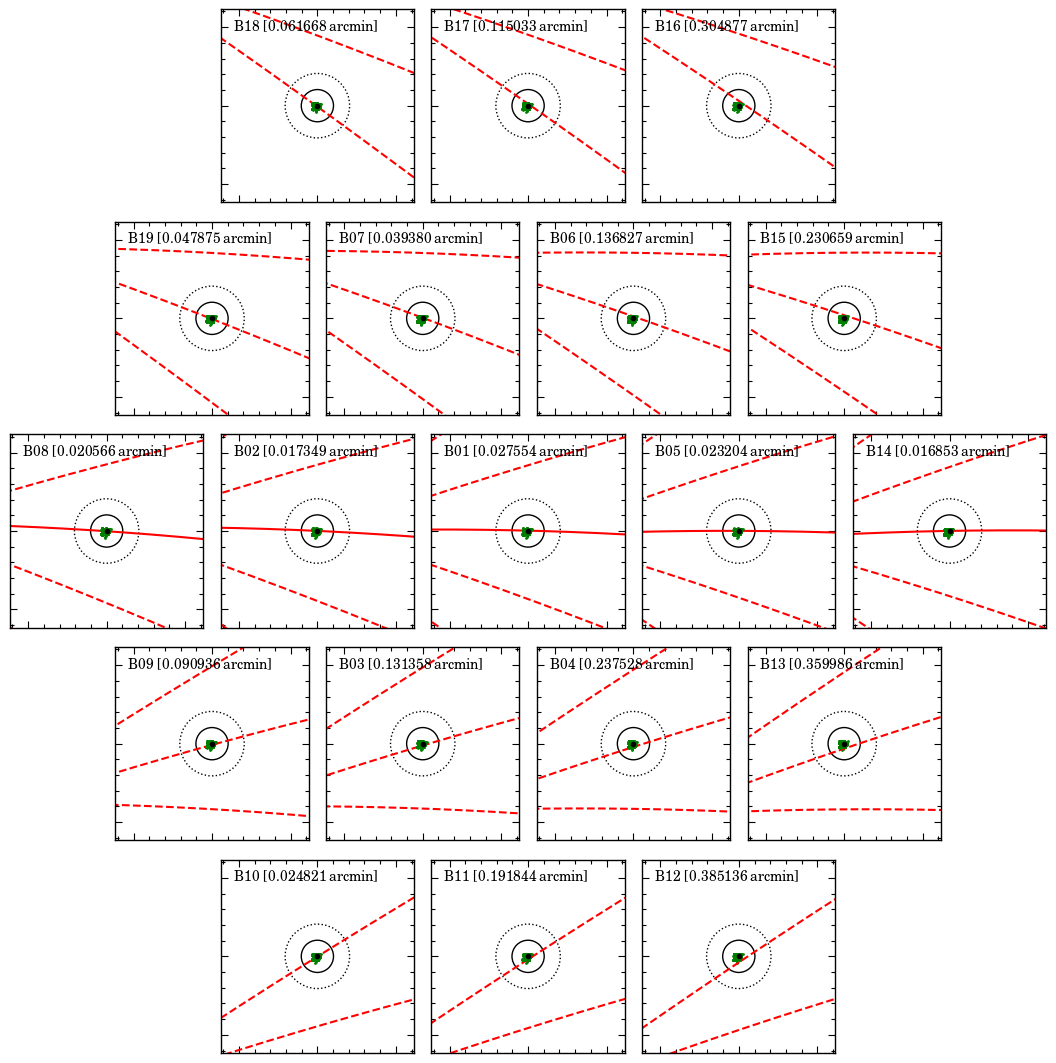

In [4]:
cal_ra  = Angle('13h31m08.287984s')
cal_dec = Angle('30d30m32.958850s') #+ ddec * u.deg
cal = SkyCoord(cal_ra, cal_dec)

wb_path = '/idia/users/ycli/fdata/coord/'
coord_file_list = [
    wb_path + '3C28-01-2_2020_05_08_23_01_00_000.xlsx',
    wb_path + '3C28-02_2020_05_08_23_08_00_000.xlsx',
    wb_path + '3C28-03_2020_05_08_23_15_00_000.xlsx',
    wb_path + '3C28-04_2020_05_08_23_22_00_000.xlsx',
    wb_path + '3C28-05_2020_05_08_23_29_00_000.xlsx',
            ]
check_pointing(cal, coord_file_list)

read ant. coord SwtDPos_X SwtDPos_Y SwtDPos_Z


7.7030776949576705 -76.26488404147449
read ant. coord SwtDPos_X SwtDPos_Y SwtDPos_Z
5.505973622834659 -72.88850439906582
read ant. coord SwtDPos_X SwtDPos_Y SwtDPos_Z
3.366364741515497 -64.4029397497855
read ant. coord SwtDPos_X SwtDPos_Y SwtDPos_Z
1.556748251054529 -31.117177601067624
read ant. coord SwtDPos_X SwtDPos_Y SwtDPos_Z
1.9003316765496976 48.786681491843865


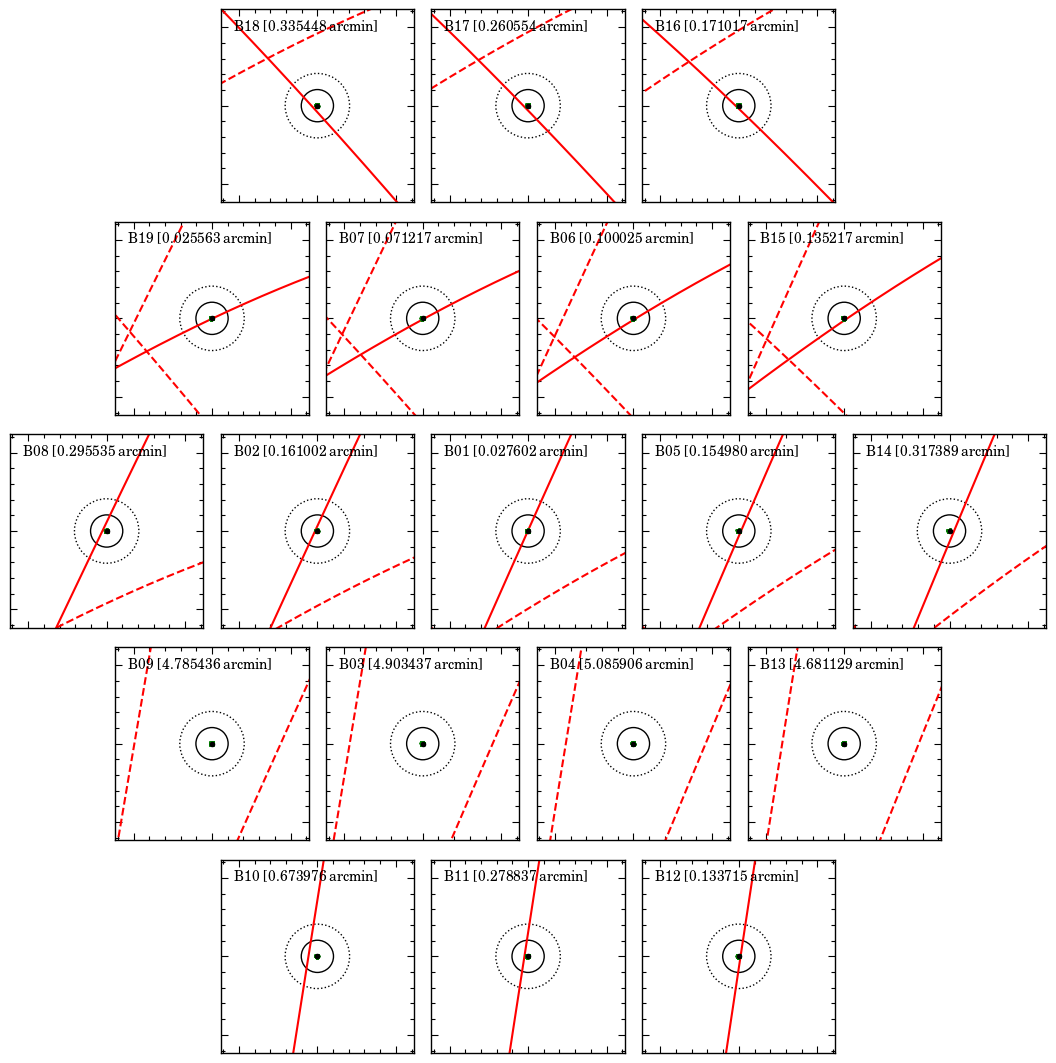

In [7]:
cal_ra  = Angle('07h41m25.7328s')
cal_dec = Angle('27d06m45.392s')
cal = SkyCoord(cal_ra, cal_dec)

wb_path = '/idia/users/ycli/fdata/coord/'
coord_file_list = [
    wb_path + 'B20738-Dec+10.22arcmin-2_2019_05_29_19_31_38_235.xlsx',
    wb_path + 'B20738-Dec+5.11arcmin-2_2019_05_29_19_31_38_235.xlsx',
    wb_path + 'B20738-Dec-0arcmin_2019_05_29_19_31_38_235.xlsx',
    wb_path + 'B20738-Dec-5.11arcmin_2019_05_29_19_31_38_235.xlsx',
    wb_path + 'B20738-Dec-10.22arcmin_2019_05_29_19_31_38_235.xlsx',
    ]
check_pointing(cal, coord_file_list)